# Activity 12: Breast Cancer Diagnosis Classification using Logistic Regression (with Answers)

In this activity we will be using the Breast Cancer dataset [https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)]( https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic) ) available under the [UCI Machine Learning Repository] (https://archive.ics.uci.edu/ml/index.php).  The dataset contains characteristics of the cell nuclei present in the digitized image of a fine needle aspirate (FNA) of a breast mass, with the labels _malignant_ and _benign_ for each cell nucleus. Throughout this activity we will use the measurements provided in the dataset to classify between malignant and benign cells.

## Import the Required Packages
For this exercise we will require the Pandas package for loading the data, the matplotlib package for plotting as well as scitkit-learn for creating the Logistic Regression model.  Import all of the required packages and relevant modules for these tasks.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

## Load the Data
Load the Breast Cancer Diagnosis dataset using Pandas and examine the first 5 rows

In [2]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  diagnosis  
0          0.4601                  0.11890  malignant  
1          0.2750                  0.08902  malignant  
2          0.3613                  0.08758  malignant  
3          0.6638                  0.17300  malignant  
4          0.2364                  0.07678  malignant  

[5 rows x 31 columns]

## Feature Engineering
We need to select the most appropriate features that will provide the most powerful classification model.  Plot a number of different features vs the allocated diagnosis classifications e.g. mean radius vs mean texture and diagnosis.  Visually inspect the plots and look for any patterns that could indicate separation between the two diagnoses.

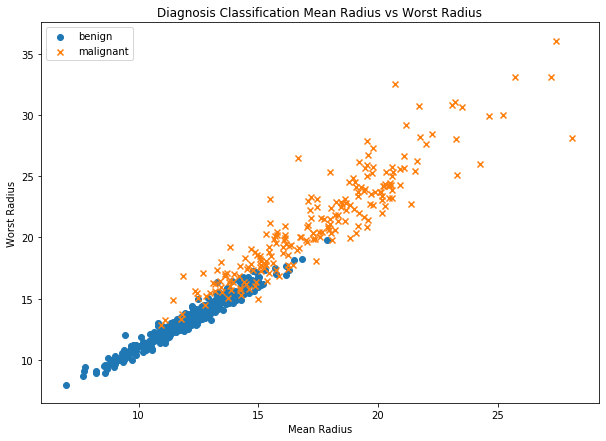

In [3]:
markers = {
    'benign': {'marker': 'o'},
    'malignant': {'marker': 'x'},
}
plt.figure(figsize=(10, 7))
for name, group in df.groupby('diagnosis'):
    plt.scatter(group['mean radius'], group['worst radius'], 
                label=name,
                marker=markers[name]['marker'],
               )
    
plt.title('Diagnosis Classification Mean Radius vs Worst Radius');
plt.xlabel('Mean Radius');
plt.ylabel('Worst Radius');
plt.legend();


Select the features by writing the column names in the list below:

In [4]:
selected_features = [
    'mean radius', # List features here
    'worst radius',
    'mean texture',
]

## Constructing the Logistic Regression Model
Before we can construct the model we must first convert the dignosis values into labels that can be used within the model.  Replace:

1. The diagnosis string *benign* with the value 0
2. The diagnosis string *malignant* with the value 1

In [5]:
diagnoses = [
    'benign', # 0
    'malignant', # 1
]
output = [diagnoses.index(diag) for diag in df.diagnosis]

Create the model using the *selected_features* and the assigned *diagnosis* labels

In [6]:
# model = LogisticRegression(multi_class='auto', solver='lbfgs')
model = LogisticRegression(solver='liblinear')
model.fit(df[selected_features], output)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Compute the accuracy of the model against the training set:

In [7]:
model.score(df[selected_features], output)

0.929701230228471

Construct another model using your second choice *selected_features* and compare the performance:

In [8]:
selected_features = [
    'mean radius', # List features here
    'mean texture',
    'compactness error'
]
model.fit(df[selected_features], output)
model.score(df[selected_features], output)

0.8927943760984183

Construct another model using all available information and compare the performance:

In [9]:
selected_features = [
    feat for feat in df.columns if feat != 'diagnosis' # List features here
]

model.fit(df[selected_features], output)
model.score(df[selected_features], output)

0.9595782073813708